# Proyecto final - Física Moderna

## Tema: Agujeros negros, quásars, pulsars y blazars.

### Valeria Torres Gomez - 202110363

Simulaciones y gráficas del proyecto final del curso

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import G, c

### Agujeros Negros

La métrica de Schwarzschild describe la geometría del espacio-tiempo alrededor de un agujero negro estático (no rotatorio). 

Fue descrita por el físico alemán Karl Schwarzschild en 1916 como una solución a las ecuaciones de campo de la teoría de la relatividad general, además, implica la existencia del horizonte de eventos.

Esta se expresa en coordenadas esféricas, donde $ds$ es el es el intervalo de espacio-tiempo, $dt$ el diferencial de tiempo, $dr$ el diferencial de distancia al radio, $d\Omega$  el elemento de ángulo sólido que representa las coordenadas angulares, $G$ la constante gravitacional, $M$ la masa del agujero negro, $c$ la velocidad de la luz, y $r$ la distancia desde el centro del agujero negro.

$$\begin{equation}
    ds^{2} = - \left( 1- \frac{2Gm}{r} \right) dt^{2} + \frac{dr^{2}}{1- \frac{2Gm}{r}} + r^{2} d \Omega^{2}
\end{equation}$$

El radio de Schwarzschild, $r_{s}$, se define como el valor de $r$ para el cual el término
$$\begin{equation}
    1- \frac{2Gm}{r_s} = 0
\end{equation}$$
se vuelve cero, es el límite en el cual la velocidad de escape se iguala a la velocidad de la luz. Al despejar la ecuación, es posible establecer la relación y obtener el radio $r_{s}$ en función de la masa $m$, donde $c$ es la velocidad de la luz.
$$
\begin{equation}
r_s = \frac{2Gm}{c^2}
\end{equation}$$

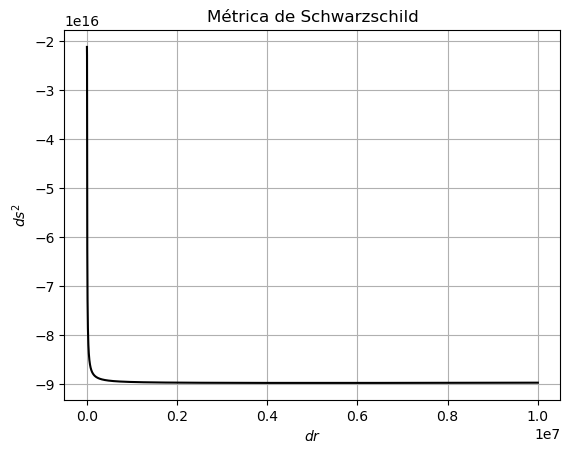

In [4]:
r_0 = 1e3
r_f = 1e7
pts = 5000
m = 1e30

r = np.linspace(r_0, r_f, pts)

ds = -(1-(2*G*m)/((c**2)*r))*(c**2)*(1-(2*G*m)/((c**2)*r))+(1/(1-(2*G*m)/((c**2)*r)))*(r**2)

plt.plot(r, ds, color="black")
plt.xlabel('$dr$')
plt.ylabel('$ds^2$')
plt.title('Métrica de Schwarzschild')
plt.grid(True)

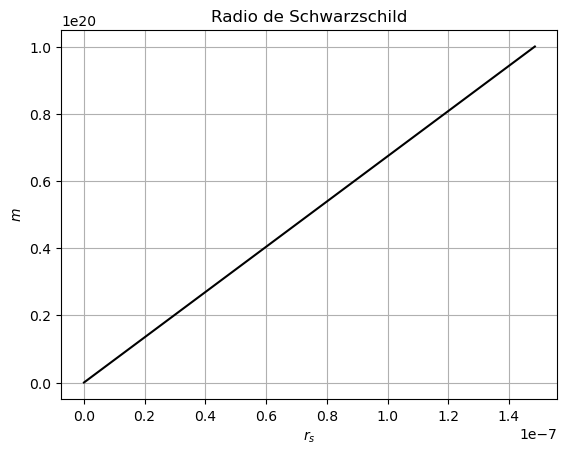

In [5]:
m = np.linspace(1, 1e20, pts)

rs = (2*G*m)/(c**2)

plt.plot(rs, m, color="black")
plt.xlabel('$r_s$')
plt.ylabel('$m$')
plt.title('Radio de Schwarzschild')
plt.grid(True)

### Quásars

El corrimiento al rojo (en inglés, red shift) se refiere al desplazamiento de la luz hacia longitudes de onda más largas, lo que produce una apariencia rojiza.

Se calcula comparando las longitudes de onda observadas de las líneas espectrales en el espectro de un quásar con las longitudes de onda de referencia. La fórmula utilizada para calcular el corrimiento al rojo $z$, donde $\lambda_{obs}$ es la longitud de onda observada de una línea espectral y $\lambda_{rest}$ es la longitud de onda de referencia:

$$\begin{equation}
    z = \frac{\lambda_{obs}-\lambda_{rest}}{\lambda_{rest}} = \sqrt{\frac{1+\frac{v}{c}}{1-\frac{v}{c}}}
\end{equation}$$

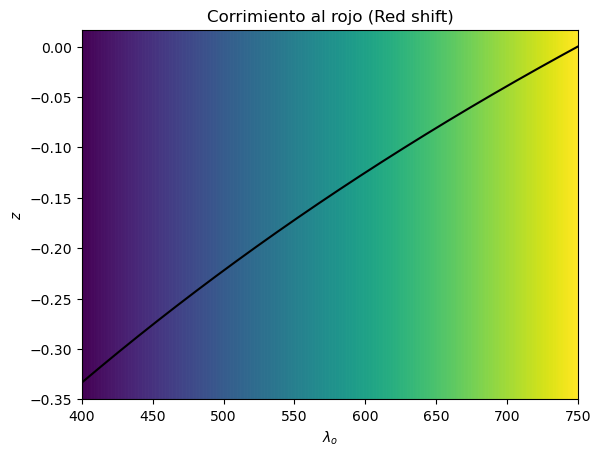

In [6]:
lambda_o = np.linspace(400, 750, 1000)
lambda_r = np.linspace(600, 750, 1000)

wavelengths = np.arange(400, 750)
colors = plt.cm.viridis(np.linspace(0, 1, len(wavelengths)))

fig, ax = plt.subplots()

for wavelength, color in zip(wavelengths, colors):
    ax.axvline(wavelength, color=color, linewidth=2)

z = (lambda_o-lambda_r)/lambda_r
plt.plot(lambda_o, z, color="black")

ax.set_xlim(400, 750)
ax.set_xlabel("$\lambda_o$")
ax.set_ylabel("$z$")
ax.set_title("Corrimiento al rojo (Red shift)")
plt.show()

### Pulsars

Para comprender mejor las limitaciones en los períodos de los pulsars, se estableció un límite inferior, basado en la aceleración centrífuga y gravitacional en una estrella en rotación, considerando una estrella casi esférica con masa $M$ y radio $R$ que gira con una velocidad angular $\Omega$, donde P es el período de rotación y $G$ es la constante gravitacional. Este límite debe cumplirse para evitar que la estrella se rompa debido a la fuerza centrífuga, lo cual implica la relación.

$$\begin{equation}
    \Omega = \frac{2 \pi}{P}
\end{equation}$$

$$\begin{equation}
    \Omega^{2} R < \frac{GM}{R^{2}}
\end{equation}$$

$$\begin{equation}
    P^{2} > \frac{4 \pi R^{3}}{3} \frac{3 \pi}{GM}
\end{equation}$$

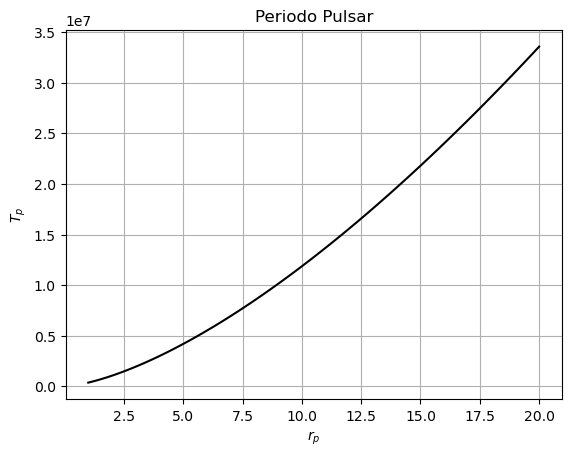

In [8]:
def pulsar_t(r, m):
    p2 = (4*(np.pi**2)*(r**3))/(3*G*m)
    t = np.sqrt(p2)
    return t

r = np.linspace(1, 20, 100)
m = 1.4
p = pulsar_t(r, m)

plt.plot(r, p, color="black")
plt.xlabel("$r_p$")
plt.ylabel("$T_p$")
plt.title("Periodo Pulsar")
plt.grid(True)
plt.show()